In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import subscript.scripts.nfilters as nf
from subscript.scripts.nodes import nodedata
import h5py
from subscript.tabulatehdf5 import  tabulate_trees
from subscript.defaults import ParamKeys

from sidmcommon.nsphere_suite import summarize_nsphere_suite
from sidmcommon.galacticus import get_nodedata_byids

In [ ]:
simdir_all_lr = '../data/NSphere/NSphere-galacticus-hr-cdm-test'
output_file_lr = '../out/nsphere_summary/NSphere-galacticus-hr-cdm-test'
path_galacticus = '../data/galacticus/mh1e13_z05_test.hdf5'

summary = summarize_nsphere_suite(simdir_all_lr, output_file_lr)
summary_lr = summary

In [3]:
file_galacticus = h5py.File(path_galacticus, 'r')

tree_galacticus = tabulate_trees(file_galacticus)[0]

nfilter = nf.r2d(None, 2e-2, 5e-2, [1,0, 0])
nfilter = nf.logical_and(nfilter, 
                            nf.subhalos_valid(None, 1e9, 1e10, ParamKeys.mass_basic))                            


mass_infall_gal, mass_bound_gal, id_gal = nodedata(tree_galacticus, [ParamKeys.mass_basic, ParamKeys.mass_bound, 'nodeIndex'], nfilter=nfilter)

In [11]:
for key in tree_galacticus.keys():
    print(key)

basicMass
basicTimeLastIsolated
concentration
darkMatterOnlyRadiusVirial
darkMatterOnlyTemperatureVirial
darkMatterOnlyVelocityVirial
darkMatterProfileScale
darkMatterProfileScaleRadius
massBound
massHaloEnclosedCurrent
mergerTreeIndex
nodeHierarchyLevel
nodeHierarchyLevelDepth
nodeHierarchyLevelMaximum
nodeIndex
nodeIsIsolated
nodeSubsamplingWeight
parentIndex
positionOrbitalX
positionOrbitalY
positionOrbitalZ
redshiftLastIsolated
satelliteBoundMass
satelliteIndex
satellitePositionX
satellitePositionY
satellitePositionZ
satelliteTidalField
satelliteTidalHeatingNormalized
satelliteVelocityX
satelliteVelocityY
satelliteVelocityZ
siblingIndex
spinAngularMomentum
spinAngularMomentumVectorX
spinAngularMomentumVectorY
spinAngularMomentumVectorZ


In [4]:
mass_bound_gal = get_nodedata_byids(list(summary.keys()), tree_galacticus, ParamKeys.mass_bound)
concentration_gal = get_nodedata_byids(list(summary.keys()), tree_galacticus, 'concentration')

massratio = []
massratio_lr = []
concentration = []
halo_ids = []

for halo_id, val in summary.items():
    massratio.append(val['massbound'][-1] / mass_bound_gal[halo_id])
    massratio_lr.append(summary[halo_id]['massbound'][-1] / mass_bound_gal[halo_id])
    concentration.append(concentration_gal[halo_id]) 
    halo_ids.append(halo_id)

massratio = np.array(massratio)
massratio_lr = np.array(massratio_lr)
concentration = np.asarray(concentration)

[]

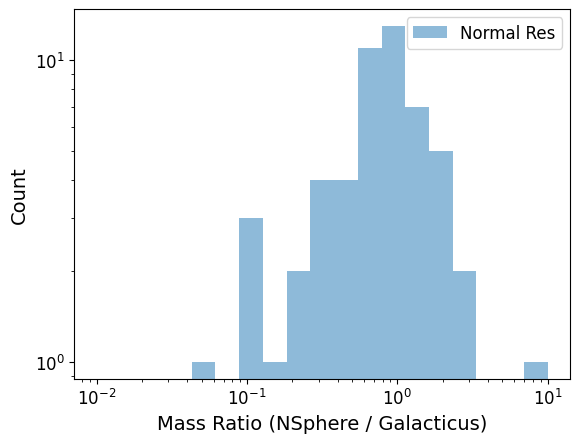

In [8]:
plt.hist(massratio, bins=np.geomspace(1e-2, 1e1, 20), alpha=0.5)
#plt.hist(massratio_lr, bins=np.geomspace(1e-2, 1e1, 20), alpha=0.5)
plt.xlabel('Mass Ratio (NSphere / Galacticus)', fontsize=14)
plt.legend(['Normal Res', 'Low Res'], fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.loglog()

In [7]:


def plot_massratio_histogram(ax, simdir, path_galacticus_out, output_file=None, label=None):
    if output_file is None:
        output_file = 'out/nsphere_summary/summary_temp'

    # Summarize nsphere output, disable caching to ensure we get the latest data
    summary = summarize_nsphere_suite(simdir, output_file, refresh=True)

    file_galacticus = h5py.File(path_galacticus_out, 'r')

    tree_galacticus = tabulate_trees(file_galacticus)[0]

    nfilter = nf.r2d(None, 2e-2, 5e-2, [1,0, 0])
    nfilter = nf.logical_and(nfilter, 
                                nf.subhalos_valid(None, 1e9, 1e10, ParamKeys.mass_basic))                            


    mass_bound_gal = nodedata(tree_galacticus, [ParamKeys.mass_bound], nfilter=nfilter)

    mass_bound_gal = get_nodedata_byids(list(summary.keys()), tree_galacticus, ParamKeys.mass_bound)
    
    massratio = []
    massratio_lr = []
    
    halo_ids = []

    for halo_id, val in summary.items():
        massratio.append(val['massbound'][-1] / mass_bound_gal[halo_id])
        massratio_lr.append(summary[halo_id]['massbound'][-1] / mass_bound_gal[halo_id])        
        halo_ids.append(halo_id)

    massratio = np.array(massratio)
    massratio_lr = np.array(massratio_lr)


    ax.hist(massratio, bins=np.geomspace(1e-2, 1e1, 20), alpha=0.5, label=label)
    ax.set_xlabel('Mass Ratio (NSphere / Galacticus)', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)